In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('chest-xray')
jovian.set_colab_id('1CpCxvdPxxWbupgoubwMWaZpvdPvW-_ca')

     |████████████████████████████████| 71kB 5.5MB/s 


# chest-xray

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="chest-xray")

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
dataset_url = 'https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia'


In [ ]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shamirafridi
Your Kaggle Key: ··········


  0%|          | 5.00M/2.29G [00:00<01:05, 37.3MB/s]

100%|██████████| 2.29G/2.29G [00:30<00:00, 80.5MB/s]


## Importing libraries

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt


In [ ]:
train_data_path = "/content/chest-xray-pneumonia/chest_xray/chest_xray/train"
val_data_path = "/content/chest-xray-pneumonia/chest_xray/chest_xray/val"

In [ ]:
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
training_data =  training_datagen.flow_from_directory(
    train_data_path,
    target_size = (300,300),
    batch_size=32,
    class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.


In [ ]:
training_data.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
valid_data =  valid_datagen.flow_from_directory(
    val_data_path,
    target_size = (300,300),
    batch_size=32,
    class_mode = 'binary'
)

Found 16 images belonging to 2 classes.


In [ ]:
def plotImages(images_arr):
  fig,axes = plt.subplots(1,5,figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

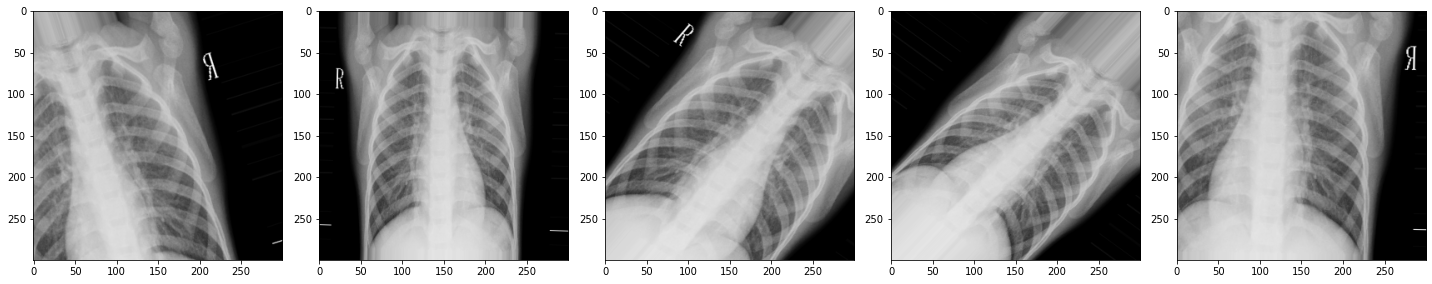

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
  cnn_model = keras.models.Sequential([
                                       keras.layers.Conv2D(filters = 32, kernel_size = 3, input_shape=[300,300,3]),
                                       keras.layers.MaxPooling2D(pool_size=(2,2)),

                                       keras.layers.Conv2D(filters = 64, kernel_size = 3),
                                       keras.layers.MaxPooling2D(pool_size=(2,2)),

                                       keras.layers.Conv2D(filters = 128, kernel_size = 3),
                                       keras.layers.MaxPooling2D(pool_size=(2,2)),

                                       keras.layers.Conv2D(filters = 256, kernel_size = 3),
                                       keras.layers.MaxPooling2D(pool_size=(2,2)),


                                       keras.layers.Dropout(0.5),
                                       keras.layers.Flatten(),
                                       keras.layers.Dense(units=128, activation='relu'),
                                       keras.layers.Dropout(0.1),
                                       keras.layers.Dense(units=128, activation='relu'),
                                       keras.layers.Dropout(0.25),
                                       keras.layers.Dense(units=2, activation='softmax')

  
  
  
  
  ])

In [ ]:
model = keras.models.Sequential([
  
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    keras.layers.MaxPooling2D(2, 2),
  
    # The second convolution
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
  
    # The third convolution
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
  
    # The fourth convolution
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
  
    # The fifth convolution
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

  
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'), # 512 neuron hidden layer
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for ('normal') clas and 1 for ('pneumonia') class
    keras.layers.Dense(2, activation='softmax')
])



# configure the model for traning by adding metrics
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model_path = '/content/chest-xray-pneumonia/chest_xray/normal_or_infected.h5'
checkpoint =  ModelCheckpoint(model_path, moniter = 'val_accuracy', verbose = 1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
history = cnn_model.fit(training_data,
                        epochs = 20,
                        verbose = 1,
                        validation_data = valid_data,
                        callbacks = callbacks_list
                        
                        )

Epoch 1/20
163/163 [==============================] - 178s 815ms/step - loss: 0.5784 - accuracy: 0.7237 - val_loss: 1.0038 - val_accuracy: 0.5625

Epoch 00001: val_loss improved from -inf to 1.00384, saving model to /content/chest-xray-pneumonia/chest_xray/normal_or_infected.h5
Epoch 2/20
163/163 [==============================] - 131s 802ms/step - loss: 0.3692 - accuracy: 0.8326 - val_loss: 0.9951 - val_accuracy: 0.6250

Epoch 00002: val_loss did not improve from 1.00384
Epoch 3/20
163/163 [==============================] - 130s 797ms/step - loss: 0.2644 - accuracy: 0.8923 - val_loss: 0.5049 - val_accuracy: 0.7500

Epoch 00003: val_loss did not improve from 1.00384
Epoch 4/20
163/163 [==============================] - 128s 784ms/step - loss: 0.3080 - accuracy: 0.8838 - val_loss: 0.5831 - val_accuracy: 0.6875

Epoch 00004: val_loss did not improve from 1.00384
Epoch 5/20
163/163 [==============================] - 128s 781ms/step - loss: 0.2478 - accuracy: 0.9011 - val_loss: 0.4803 - va

In [ ]:
model_path = '/content/chest-xray-pneumonia/chest_xray/normal_or_infected2.h5'
checkpoint2 =  ModelCheckpoint(model_path, moniter = 'val_accuracy', verbose = 1, save_best_only=True, mode='max')
callbacks_list2 = [checkpoint2]

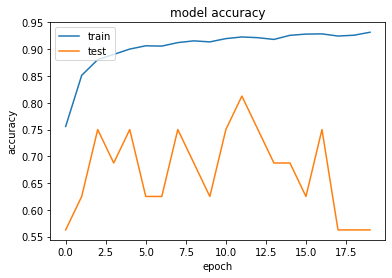

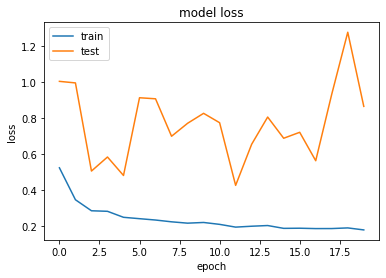

In [ ]:
# summerize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

#summerize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()